In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Random images of Tanker

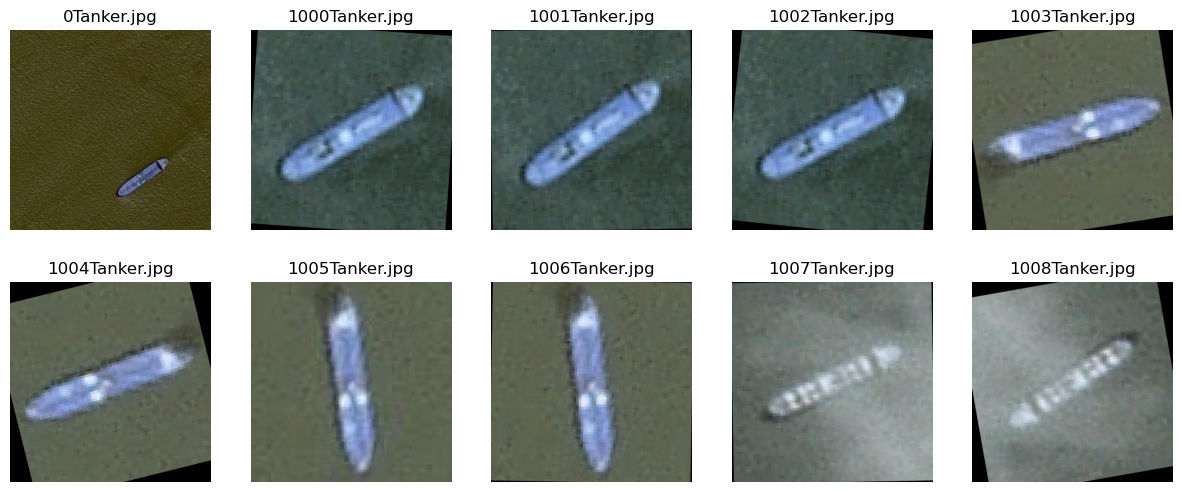

In [6]:
import cv2
import matplotlib.pyplot as plt
import os

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

images = os.listdir("Data\\Tanker\\")
for i in range(10):
    img = cv2.imread('Data\\Tanker\\'+images[i])
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(images[i])
    axs[i].axis('off')

plt.show()


# without applying the laplacian filter

In [16]:
# Loading the data 
def load_and_preprocess_data(data_dir):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        

        for filename in os.listdir(class_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(class_path, filename)
                img = cv2.imread(image_path)
                img = cv2.resize(img, (32, 32))  # Resize to the desired input size
                img = np.array(img)
                img = img / 255.0  # Normalize pixel values to [0, 1]
                images.append(img)
                labels.append(class_folder)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [17]:
data_dir = 'Data'
images, labels = load_and_preprocess_data(data_dir)


In [19]:
print(images[0].shape)

(32, 32, 3)


In [23]:
print(len(labels))

4428


In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

encoded_labels[0:10]
# classes = [4,3,2,1]


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

#### Resnet 

In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [56]:
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model.trainable = False

inp = layers.Input(shape=(32, 32, 3))
layer = model(inp, training=False)
layer = layers.GlobalAveragePooling2D()(layer)
layer = layers.Dense(128, activation='relu')(layer)
layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(64, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(32, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(32, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
layer = layers.Dense(5, activation='softmax')(layer)
model = tf.keras.Model(inp, layer)



lr = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 128)               262272    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 5)                 645       
                                                           

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.3, stratify=encoded_labels)

In [58]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size = 100)

Epoch 1/100


D:\Anaconda\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


31/31 [==============================] - 11s 251ms/step - loss: 2.0807 - accuracy: 0.3266 - val_loss: 1.2433 - val_accuracy: 0.5478
Epoch 2/100
31/31 [==============================] - 7s 224ms/step - loss: 1.4826 - accuracy: 0.4430 - val_loss: 1.1007 - val_accuracy: 0.5809
Epoch 3/100
31/31 [==============================] - 7s 225ms/step - loss: 1.2742 - accuracy: 0.4753 - val_loss: 1.0797 - val_accuracy: 0.5711
Epoch 4/100
31/31 [==============================] - 8s 259ms/step - loss: 1.1748 - accuracy: 0.5011 - val_loss: 1.0496 - val_accuracy: 0.5982
Epoch 5/100
31/31 [==============================] - 8s 274ms/step - loss: 1.1217 - accuracy: 0.5318 - val_loss: 1.0354 - val_accuracy: 0.5989
Epoch 6/100
31/31 [==============================] - 8s 276ms/step - loss: 1.0844 - accuracy: 0.5634 - val_loss: 1.0227 - val_accuracy: 0.5907
Epoch 7/100
31/31 [==============================] - 8s 256ms/step - loss: 1.0750 - accuracy: 0.5641 - val_loss: 1.0129 - val_accuracy: 0.6230
Epoch 8/10

31/31 [==============================] - 7s 243ms/step - loss: 0.8100 - accuracy: 0.7170 - val_loss: 0.7514 - val_accuracy: 0.7555
Epoch 59/100
31/31 [==============================] - 7s 242ms/step - loss: 0.8092 - accuracy: 0.7183 - val_loss: 0.7699 - val_accuracy: 0.7299
Epoch 60/100
31/31 [==============================] - 8s 259ms/step - loss: 0.8082 - accuracy: 0.7177 - val_loss: 0.7470 - val_accuracy: 0.7645
Epoch 61/100
31/31 [==============================] - 7s 240ms/step - loss: 0.7948 - accuracy: 0.7238 - val_loss: 0.7394 - val_accuracy: 0.7540
Epoch 62/100
31/31 [==============================] - 7s 240ms/step - loss: 0.7956 - accuracy: 0.7283 - val_loss: 0.7388 - val_accuracy: 0.7607
Epoch 63/100
31/31 [==============================] - 8s 246ms/step - loss: 0.8000 - accuracy: 0.7302 - val_loss: 0.7317 - val_accuracy: 0.7622
Epoch 64/100
31/31 [==============================] - 8s 249ms/step - loss: 0.7946 - accuracy: 0.7235 - val_loss: 0.7345 - val_accuracy: 0.7615
Epoch

In [59]:
ypred = np.argmax(model.predict(X_test),axis=1)
print("Accuracy:",accuracy_score(y_test, ypred))
print("Classification Report:\n", classification_report(y_test, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))

42/42 [==============================] - 6s 97ms/step
Accuracy: 0.7870579382994732
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.82      0.36      0.50        91
           2       0.76      0.91      0.82       591
           3       0.83      0.85      0.84       565
           4       0.00      0.00      0.00        33

    accuracy                           0.79      1329
   macro avg       0.48      0.42      0.43      1329
weighted avg       0.74      0.79      0.76      1329

Confusion Matrix:
 [[  0   0  32  17   0]
 [  0  33  41  17   0]
 [  2   2 535  52   0]
 [  0   4  83 478   0]
 [  1   1  16  15   0]]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### CNN

In [51]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [53]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size = 100)

Epoch 1/20
31/31 [==============================] - 2s 63ms/step - loss: 0.2126 - accuracy: 0.9326 - val_loss: 0.2270 - val_accuracy: 0.9300
Epoch 2/20
31/31 [==============================] - 2s 62ms/step - loss: 0.1764 - accuracy: 0.9455 - val_loss: 0.2367 - val_accuracy: 0.9270
Epoch 3/20
31/31 [==============================] - 2s 64ms/step - loss: 0.1863 - accuracy: 0.9364 - val_loss: 0.2315 - val_accuracy: 0.9315
Epoch 4/20
31/31 [==============================] - 2s 63ms/step - loss: 0.1565 - accuracy: 0.9519 - val_loss: 0.2121 - val_accuracy: 0.9323
Epoch 5/20
31/31 [==============================] - 2s 58ms/step - loss: 0.1444 - accuracy: 0.9551 - val_loss: 0.2128 - val_accuracy: 0.9315
Epoch 6/20
31/31 [==============================] - 2s 58ms/step - loss: 0.1474 - accuracy: 0.9497 - val_loss: 0.2172 - val_accuracy: 0.9293
Epoch 7/20
31/31 [==============================] - 2s 58ms/step - loss: 0.1313 - accuracy: 0.9587 - val_loss: 0.2164 - val_accuracy: 0.9345
Epoch 8/20
31

In [55]:
ypred = np.argmax(model.predict(X_test),axis=1)
print("Accuracy:",accuracy_score(y_test, ypred))
print("Classification Report:\n", classification_report(y_test, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))

42/42 [==============================] - 0s 6ms/step
Accuracy: 0.9367945823927766
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        49
           1       0.78      0.80      0.79        91
           2       0.96      0.97      0.96       591
           3       0.99      0.96      0.97       565
           4       0.45      0.45      0.45        33

    accuracy                           0.94      1329
   macro avg       0.79      0.80      0.79      1329
weighted avg       0.94      0.94      0.94      1329

Confusion Matrix:
 [[ 40   5   2   1   1]
 [  3  73   7   2   6]
 [  0   7 574   4   6]
 [  3   4  10 543   5]
 [  6   5   6   1  15]]


## using laplacian filter

#### Applied Laplacian filter to the image
- #### Laplacian filter is a second derivative edge detection filter
- #### It is used to find edges in an image
- #### It is very sensitive to noise
- #### It is used to sharpen an image
- #### It is used to detect edges in an image
- #### It is used to enhance edges in an image

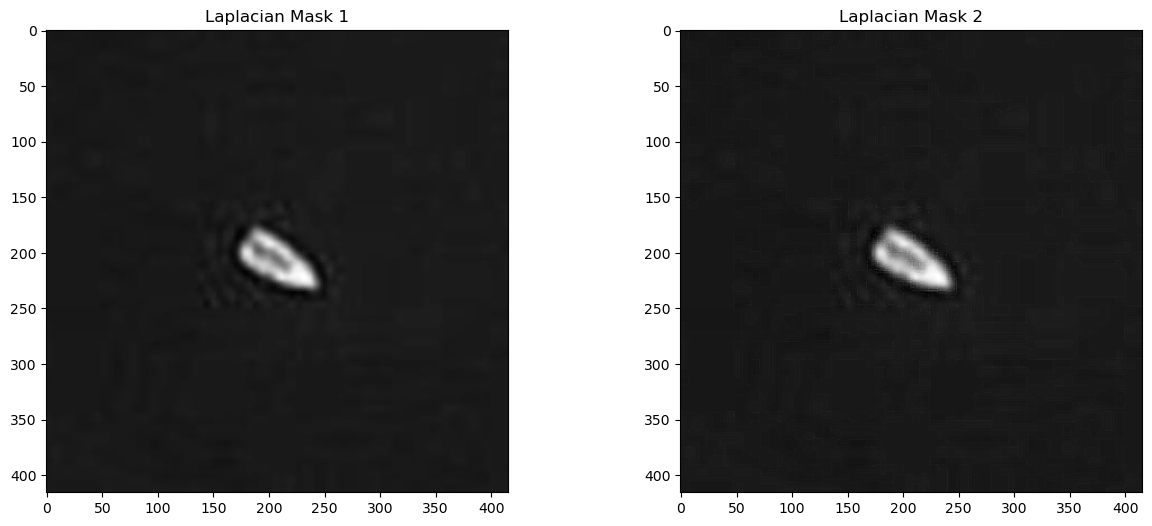

In [61]:
# applying laplacian Filter
img = cv2.imread('Data//Fishing vessel//0Fishing vessel.jpg',0)

def applyLaplacian(laplacianMask, img):
    filteredImg = cv2.filter2D(img, -1, laplacianMask)
    finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))
    return finalImg

laplacianMask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  
final_img = applyLaplacian(laplacianMask, img)

laplacianMask2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
final_img2 = applyLaplacian(laplacianMask2, img)


fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(final_img, cmap='gray')
axs[0].set_title('Laplacian Mask 1')
axs[1].imshow(final_img2, cmap='gray')
axs[1].set_title('Laplacian Mask 2')
plt.show()

In [68]:
# Loading the data 
def load_and_preprocess_data(data_dir,laplacianMask):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        

        for filename in os.listdir(class_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(class_path, filename)
                img = cv2.imread(image_path)
                img = applyLaplacian(laplacianMask, img)
                img = cv2.resize(img, (32, 32))  # Resize to the desired input size
                img = np.array(img)
                img = img / 255.0  # Normalize pixel values to [0, 1]
                images.append(img)
                labels.append(class_folder)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [69]:
data_dir = 'Data'
images_1, labels_1 = load_and_preprocess_data(data_dir,laplacianMask)
images_2, labels_2 = load_and_preprocess_data(data_dir,laplacianMask2)


In [70]:
print(images_1[0].shape)
print(images_2[0].shape)
print(len(labels_1))
print(len(labels_2))

(32, 32, 3)
(32, 32, 3)
4428
4428


In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_labels_1 = label_encoder.fit_transform(labels_1)
encoded_labels_2 = label_encoder.fit_transform(labels_2)

print(encoded_labels_1[0:10])
print(encoded_labels_2[0:10])
# classes = [4,3,2,1]


[4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4]


#### Resnet

In [64]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [62]:
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model.trainable = False

inp = layers.Input(shape=(32, 32, 3))
layer = model(inp, training=False)
layer = layers.GlobalAveragePooling2D()(layer)
layer = layers.Dense(128, activation='relu')(layer)
layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(64, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(32, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(32, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
layer = layers.Dense(5, activation='softmax')(layer)
model = tf.keras.Model(inp, layer)



lr = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_11 (Dense)            (None, 128)               262272    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 5)                 645       
                                                           

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(images_1, encoded_labels_1, test_size=0.3, stratify=encoded_labels_1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(images_2, encoded_labels_2, test_size=0.3, stratify=encoded_labels_2)

In [74]:
model.fit(X_train_1, y_train_1, epochs=100, validation_data=(X_test_1, y_test_1), batch_size = 100)

Epoch 1/100


D:\Anaconda\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


31/31 [==============================] - 16s 368ms/step - loss: 2.1025 - accuracy: 0.3598 - val_loss: 1.1481 - val_accuracy: 0.6366
Epoch 2/100
31/31 [==============================] - 8s 259ms/step - loss: 1.4917 - accuracy: 0.4434 - val_loss: 1.0583 - val_accuracy: 0.6275
Epoch 3/100
31/31 [==============================] - 8s 252ms/step - loss: 1.2497 - accuracy: 0.4850 - val_loss: 1.0526 - val_accuracy: 0.5335
Epoch 4/100
31/31 [==============================] - 8s 257ms/step - loss: 1.1377 - accuracy: 0.5389 - val_loss: 1.0233 - val_accuracy: 0.6599
Epoch 5/100
31/31 [==============================] - 8s 263ms/step - loss: 1.0750 - accuracy: 0.5812 - val_loss: 1.0113 - val_accuracy: 0.6095
Epoch 6/100
31/31 [==============================] - 8s 261ms/step - loss: 1.0448 - accuracy: 0.6121 - val_loss: 0.9977 - val_accuracy: 0.6599
Epoch 7/100
31/31 [==============================] - 8s 259ms/step - loss: 1.0506 - accuracy: 0.5992 - val_loss: 0.9915 - val_accuracy: 0.6682
Epoch 8/10

31/31 [==============================] - 7s 239ms/step - loss: 0.7512 - accuracy: 0.7502 - val_loss: 0.7295 - val_accuracy: 0.7630
Epoch 59/100
31/31 [==============================] - 7s 237ms/step - loss: 0.7454 - accuracy: 0.7470 - val_loss: 0.7195 - val_accuracy: 0.7698
Epoch 60/100
31/31 [==============================] - 7s 239ms/step - loss: 0.7344 - accuracy: 0.7551 - val_loss: 0.7210 - val_accuracy: 0.7645
Epoch 61/100
31/31 [==============================] - 8s 256ms/step - loss: 0.7548 - accuracy: 0.7425 - val_loss: 0.7363 - val_accuracy: 0.7540
Epoch 62/100
31/31 [==============================] - 7s 243ms/step - loss: 0.7554 - accuracy: 0.7460 - val_loss: 0.7147 - val_accuracy: 0.7675
Epoch 63/100
31/31 [==============================] - 7s 241ms/step - loss: 0.7319 - accuracy: 0.7561 - val_loss: 0.7110 - val_accuracy: 0.7765
Epoch 64/100
31/31 [==============================] - 7s 241ms/step - loss: 0.7339 - accuracy: 0.7554 - val_loss: 0.7070 - val_accuracy: 0.7795
Epoch

In [75]:
ypred = np.argmax(model.predict(X_test_1),axis=1)
print("Accuracy:",accuracy_score(y_test_1, ypred))
print("Classification Report:\n", classification_report(y_test_1, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test_1, ypred))

42/42 [==============================] - 5s 93ms/step
Accuracy: 0.7908201655379985
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.92      0.26      0.41        91
           2       0.76      0.90      0.82       591
           3       0.83      0.88      0.85       565
           4       0.00      0.00      0.00        33

    accuracy                           0.79      1329
   macro avg       0.50      0.41      0.42      1329
weighted avg       0.75      0.79      0.76      1329

Confusion Matrix:
 [[  0   0  45   4   0]
 [  0  24  41  26   0]
 [  0   0 531  60   0]
 [  0   1  68 496   0]
 [  0   1  17  15   0]]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
model.fit(X_train_2, y_train_2, epochs=100, validation_data=(X_test_2, y_test_2), batch_size = 100)

Epoch 1/100
31/31 [==============================] - 8s 247ms/step - loss: 0.6773 - accuracy: 0.7757 - val_loss: 0.6147 - val_accuracy: 0.8066
Epoch 2/100
31/31 [==============================] - 7s 242ms/step - loss: 0.6650 - accuracy: 0.7848 - val_loss: 0.6129 - val_accuracy: 0.8029
Epoch 3/100
31/31 [==============================] - 7s 244ms/step - loss: 0.6768 - accuracy: 0.7773 - val_loss: 0.6157 - val_accuracy: 0.8089
Epoch 4/100
31/31 [==============================] - 7s 239ms/step - loss: 0.6660 - accuracy: 0.7812 - val_loss: 0.6093 - val_accuracy: 0.8059
Epoch 5/100
31/31 [==============================] - 7s 239ms/step - loss: 0.6671 - accuracy: 0.7812 - val_loss: 0.6093 - val_accuracy: 0.8059
Epoch 6/100
31/31 [==============================] - 7s 241ms/step - loss: 0.6618 - accuracy: 0.7886 - val_loss: 0.6057 - val_accuracy: 0.8126
Epoch 7/100
31/31 [==============================] - 8s 255ms/step - loss: 0.6547 - accuracy: 0.7825 - val_loss: 0.6047 - val_accuracy: 0.8111

Epoch 58/100
31/31 [==============================] - 7s 240ms/step - loss: 0.6099 - accuracy: 0.7996 - val_loss: 0.5585 - val_accuracy: 0.8254
Epoch 59/100
31/31 [==============================] - 7s 240ms/step - loss: 0.6097 - accuracy: 0.7983 - val_loss: 0.5516 - val_accuracy: 0.8232
Epoch 60/100
31/31 [==============================] - 7s 241ms/step - loss: 0.6042 - accuracy: 0.8070 - val_loss: 0.5745 - val_accuracy: 0.8157
Epoch 61/100
31/31 [==============================] - 8s 261ms/step - loss: 0.6138 - accuracy: 0.8028 - val_loss: 0.5589 - val_accuracy: 0.8254
Epoch 62/100
31/31 [==============================] - 7s 241ms/step - loss: 0.6023 - accuracy: 0.8035 - val_loss: 0.5548 - val_accuracy: 0.8247
Epoch 63/100
31/31 [==============================] - 7s 242ms/step - loss: 0.6086 - accuracy: 0.8028 - val_loss: 0.5583 - val_accuracy: 0.8111
Epoch 64/100
31/31 [==============================] - 7s 239ms/step - loss: 0.5996 - accuracy: 0.8096 - val_loss: 0.5511 - val_accuracy:

In [77]:
ypred = np.argmax(model.predict(X_test_2),axis=1)
print("Accuracy:",accuracy_score(y_test_2, ypred))
print("Classification Report:\n", classification_report(y_test_2, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test_2, ypred))

42/42 [==============================] - 3s 80ms/step
Accuracy: 0.8306997742663657
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.75      0.49      0.60        91
           2       0.79      0.93      0.86       591
           3       0.89      0.90      0.89       565
           4       0.00      0.00      0.00        33

    accuracy                           0.83      1329
   macro avg       0.49      0.47      0.47      1329
weighted avg       0.78      0.83      0.80      1329

Confusion Matrix:
 [[  0   2  45   2   0]
 [  0  45  32  14   0]
 [  0   4 551  36   0]
 [  0   7  50 508   0]
 [  0   2  17  14   0]]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### CNN

In [78]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 2, 128)        

In [79]:
model.fit(X_train_1, y_train_1, epochs=20, validation_data=(X_test_1, y_test_1), batch_size = 100)

Epoch 1/20
31/31 [==============================] - 3s 69ms/step - loss: 1.1060 - accuracy: 0.5799 - val_loss: 0.7454 - val_accuracy: 0.7795
Epoch 2/20
31/31 [==============================] - 2s 68ms/step - loss: 0.7088 - accuracy: 0.7764 - val_loss: 0.5697 - val_accuracy: 0.8134
Epoch 3/20
31/31 [==============================] - 2s 67ms/step - loss: 0.5812 - accuracy: 0.8128 - val_loss: 0.4748 - val_accuracy: 0.8616
Epoch 4/20
31/31 [==============================] - 4s 131ms/step - loss: 0.5110 - accuracy: 0.8419 - val_loss: 0.5199 - val_accuracy: 0.8179
Epoch 5/20
31/31 [==============================] - 4s 138ms/step - loss: 0.4761 - accuracy: 0.8587 - val_loss: 0.4078 - val_accuracy: 0.8683
Epoch 6/20
31/31 [==============================] - 2s 63ms/step - loss: 0.4109 - accuracy: 0.8783 - val_loss: 0.3667 - val_accuracy: 0.8901
Epoch 7/20
31/31 [==============================] - 2s 62ms/step - loss: 0.3860 - accuracy: 0.8884 - val_loss: 0.3647 - val_accuracy: 0.8774
Epoch 8/20


In [80]:
ypred = np.argmax(model.predict(X_test_1),axis=1)
print("Accuracy:",accuracy_score(y_test_1, ypred))
print("Classification Report:\n", classification_report(y_test_1, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test_1, ypred))

42/42 [==============================] - 0s 6ms/step
Accuracy: 0.927765237020316
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75        49
           1       0.72      0.71      0.72        91
           2       0.93      0.98      0.95       591
           3       0.98      0.97      0.97       565
           4       0.45      0.30      0.36        33

    accuracy                           0.93      1329
   macro avg       0.79      0.72      0.75      1329
weighted avg       0.92      0.93      0.92      1329

Confusion Matrix:
 [[ 32   6   6   2   3]
 [  2  65  18   3   3]
 [  1   5 577   6   2]
 [  0   3   9 549   4]
 [  1  11   9   2  10]]


In [81]:
model.fit(X_train_2, y_train_2, epochs=20, validation_data=(X_test_2, y_test_2), batch_size = 100)

Epoch 1/20
31/31 [==============================] - 2s 66ms/step - loss: 0.2142 - accuracy: 0.9358 - val_loss: 0.2058 - val_accuracy: 0.9368
Epoch 2/20
31/31 [==============================] - 6s 182ms/step - loss: 0.1923 - accuracy: 0.9413 - val_loss: 0.1989 - val_accuracy: 0.9406
Epoch 3/20
31/31 [==============================] - 2s 67ms/step - loss: 0.1862 - accuracy: 0.9416 - val_loss: 0.1952 - val_accuracy: 0.9375
Epoch 4/20
31/31 [==============================] - 2s 63ms/step - loss: 0.1531 - accuracy: 0.9526 - val_loss: 0.2087 - val_accuracy: 0.9421
Epoch 5/20
31/31 [==============================] - 2s 74ms/step - loss: 0.1589 - accuracy: 0.9510 - val_loss: 0.1838 - val_accuracy: 0.9451
Epoch 6/20
31/31 [==============================] - 2s 65ms/step - loss: 0.1489 - accuracy: 0.9535 - val_loss: 0.2397 - val_accuracy: 0.9248
Epoch 7/20
31/31 [==============================] - 2s 65ms/step - loss: 0.1499 - accuracy: 0.9506 - val_loss: 0.1937 - val_accuracy: 0.9398
Epoch 8/20
3

In [82]:
ypred = np.argmax(model.predict(X_test_2),axis=1)
print("Accuracy:",accuracy_score(y_test_2, ypred))
print("Classification Report:\n", classification_report(y_test_2, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test_2, ypred))

42/42 [==============================] - 0s 10ms/step
Accuracy: 0.9473288186606471
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        49
           1       0.86      0.81      0.84        91
           2       0.95      0.98      0.97       591
           3       0.97      0.97      0.97       565
           4       0.60      0.55      0.57        33

    accuracy                           0.95      1329
   macro avg       0.87      0.83      0.85      1329
weighted avg       0.95      0.95      0.95      1329

Confusion Matrix:
 [[ 41   2   1   2   3]
 [  0  74   9   2   6]
 [  0   4 578   8   1]
 [  2   4   9 548   2]
 [  0   2   9   4  18]]


## Doing Data Augmentation and then Classifying

In [115]:
from keras.preprocessing.image import ImageDataGenerator

def load_and_preprocess_data(data_dir, laplacianMask, augment=True):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)
    
    max_images_per_class = max([len(os.listdir(os.path.join(data_dir, class_folder))) for class_folder in class_folders])
#     print(max_images_per_class)

    # Create an ImageDataGenerator with desired augmentation settings
    datagen = ImageDataGenerator(
        rotation_range=45, 
        horizontal_flip=True, 
        width_shift_range=0.5, 
        height_shift_range=0.5, 
        dtype='float32'
    )

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        for filename in os.listdir(class_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(class_path, filename)
                img = cv2.imread(image_path)
                img = applyLaplacian(laplacianMask, img)
                img = cv2.resize(img, (32, 32))  # Resize to the desired input size
                img = np.array(img)
                img = img / 255.0  # Normalize pixel values to [0, 1]
                images.append(img)
                labels.append(class_folder)
            

        if augment:
            class_images = np.array([img for img, label in zip(images, labels) if label == class_folder])
            num_images_to_generate = max_images_per_class - len(class_images)

            if num_images_to_generate > 0:
                augmented_images = []
                for i in range(num_images_to_generate):
                    augmented_img = datagen.flow(np.array([class_images[i % len(class_images)]]), batch_size=1)[0]
#                     print(augmented_img.shape)
                    augmented_img = augmented_img[0]
                    augmented_images.append(augmented_img)
                
                images.extend(augmented_images)
                labels.extend([class_folder] * num_images_to_generate)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels


In [116]:
data_dir = 'Data'
images_2, labels_2 = load_and_preprocess_data(data_dir,laplacianMask2)

In [117]:
print(len(labels_2))

9845


In [122]:
label_encoder = LabelEncoder()

encoded_labels_2 = label_encoder.fit_transform(labels_2)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(images_2, encoded_labels_2, test_size=0.3, stratify=encoded_labels_2)

#### Resnet

In [123]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [124]:
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model.trainable = False

inp = layers.Input(shape=(32, 32, 3))
layer = model(inp, training=False)
layer = layers.GlobalAveragePooling2D()(layer)
layer = layers.Dense(128, activation='relu')(layer)
layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(64, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(32, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(32, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
layer = layers.Dense(5, activation='softmax')(layer)
model = tf.keras.Model(inp, layer)



lr = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [125]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_17 (Dense)            (None, 128)               262272    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 5)                 645       
                                                           

In [126]:
model.fit(X_train_2, y_train_2, epochs=100, validation_data=(X_test_2, y_test_2), batch_size = 100)

Epoch 1/100


D:\Anaconda\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


69/69 [==============================] - 36s 414ms/step - loss: 2.3007 - accuracy: 0.2010 - val_loss: 1.6012 - val_accuracy: 0.2644
Epoch 2/100
69/69 [==============================] - 18s 262ms/step - loss: 1.6637 - accuracy: 0.2274 - val_loss: 1.5627 - val_accuracy: 0.3358
Epoch 3/100
69/69 [==============================] - 18s 264ms/step - loss: 1.5658 - accuracy: 0.2831 - val_loss: 1.5395 - val_accuracy: 0.3450
Epoch 4/100
69/69 [==============================] - 18s 261ms/step - loss: 1.5451 - accuracy: 0.3090 - val_loss: 1.5205 - val_accuracy: 0.3778
Epoch 5/100
69/69 [==============================] - 17s 251ms/step - loss: 1.5282 - accuracy: 0.3248 - val_loss: 1.5085 - val_accuracy: 0.3636
Epoch 6/100
69/69 [==============================] - 21s 307ms/step - loss: 1.5124 - accuracy: 0.3444 - val_loss: 1.4880 - val_accuracy: 0.3984
Epoch 7/100
69/69 [==============================] - 18s 264ms/step - loss: 1.4987 - accuracy: 0.3494 - val_loss: 1.4733 - val_accuracy: 0.4147
Epoc

69/69 [==============================] - 21s 312ms/step - loss: 1.2216 - accuracy: 0.4844 - val_loss: 1.1620 - val_accuracy: 0.5102
Epoch 58/100
69/69 [==============================] - 21s 307ms/step - loss: 1.2185 - accuracy: 0.4896 - val_loss: 1.1648 - val_accuracy: 0.5237
Epoch 59/100
69/69 [==============================] - 22s 313ms/step - loss: 1.2152 - accuracy: 0.4941 - val_loss: 1.1659 - val_accuracy: 0.5284
Epoch 60/100
69/69 [==============================] - 21s 306ms/step - loss: 1.2150 - accuracy: 0.4882 - val_loss: 1.1581 - val_accuracy: 0.5230
Epoch 61/100
69/69 [==============================] - 22s 320ms/step - loss: 1.2100 - accuracy: 0.4935 - val_loss: 1.1589 - val_accuracy: 0.5108
Epoch 62/100
69/69 [==============================] - 21s 304ms/step - loss: 1.2069 - accuracy: 0.4925 - val_loss: 1.1581 - val_accuracy: 0.5284
Epoch 63/100
69/69 [==============================] - 21s 311ms/step - loss: 1.2089 - accuracy: 0.4989 - val_loss: 1.1453 - val_accuracy: 0.536

In [127]:
ypred = np.argmax(model.predict(X_test_2),axis=1)
print("Accuracy:",accuracy_score(y_test_2, ypred))
print("Classification Report:\n", classification_report(y_test_2, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test_2, ypred))

93/93 [==============================] - 10s 84ms/step
Accuracy: 0.5396073121191605
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64       591
           1       0.40      0.42      0.41       590
           2       0.49      0.43      0.46       591
           3       0.64      0.91      0.75       591
           4       0.43      0.35      0.39       591

    accuracy                           0.54      2954
   macro avg       0.53      0.54      0.53      2954
weighted avg       0.53      0.54      0.53      2954

Confusion Matrix:
 [[344  43 115  39  50]
 [ 29 250  73  63 175]
 [ 88 102 256  98  47]
 [  2  30  14 536   9]
 [ 13 194  69 107 208]]


#### CNN

In [128]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
model.fit(X_train_2, y_train_2, epochs=20, validation_data=(X_test_2, y_test_2), batch_size = 100)

Epoch 1/20
69/69 [==============================] - 6s 68ms/step - loss: 1.2951 - accuracy: 0.4410 - val_loss: 1.0010 - val_accuracy: 0.6422
Epoch 2/20
69/69 [==============================] - 4s 63ms/step - loss: 0.9289 - accuracy: 0.6474 - val_loss: 0.7982 - val_accuracy: 0.7173
Epoch 3/20
69/69 [==============================] - 4s 63ms/step - loss: 0.8063 - accuracy: 0.6998 - val_loss: 0.7083 - val_accuracy: 0.7441
Epoch 4/20
69/69 [==============================] - 4s 64ms/step - loss: 0.7322 - accuracy: 0.7292 - val_loss: 0.6482 - val_accuracy: 0.7630
Epoch 5/20
69/69 [==============================] - 4s 63ms/step - loss: 0.6568 - accuracy: 0.7620 - val_loss: 0.5799 - val_accuracy: 0.7969
Epoch 6/20
69/69 [==============================] - 4s 61ms/step - loss: 0.5956 - accuracy: 0.7862 - val_loss: 0.5398 - val_accuracy: 0.7962
Epoch 7/20
69/69 [==============================] - 4s 64ms/step - loss: 0.5522 - accuracy: 0.8050 - val_loss: 0.5429 - val_accuracy: 0.8070
Epoch 8/20
69

In [ ]:
ypred = np.argmax(model.predict(X_test_2),axis=1)
print("Accuracy:",accuracy_score(y_test_2, ypred))
print("Classification Report:\n", classification_report(y_test_2, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test_2, ypred))